## A* Implementation  on a maze

Path: [(4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4)]
Cost: 8
Optimal = True


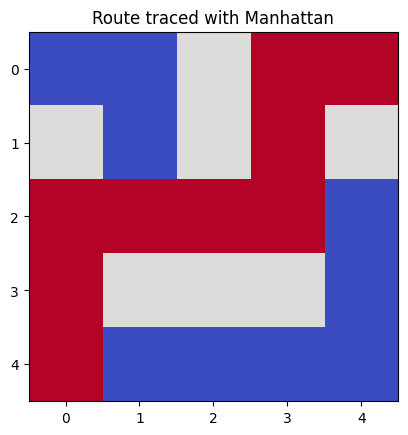


Case 1: h = 1.5 * Manhattan
Path: [(4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4)]
Cost: 8
Optimal =  True

Case 2: Inconsistent Heuristic
Path: [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3), (0, 4)]
Cost: 10
Optimal =  False


In [8]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# maze grid setup
maze = [
    [0, 0, 1, 0, "B"],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    ["A", 0, 0, 0, 0]
]

rows, cols = len(maze), len(maze[0])

# detect source and destination
for i in range(rows):
    for j in range(cols):
        if maze[i][j] == "A":
            start = (i, j)
            maze[i][j] = 0
        if maze[i][j] == "B":
            goal = (i, j)
            maze[i][j] = 0

def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def astar(grid, source, target, h_func):
    r, c = len(grid), len(grid[0])
    pq = []
    heapq.heappush(pq, (0, source))
    
    parent = {}
    g_val = {source: 0}
    f_val = {source: h_func(source, target)}
    
    while pq:
        _, curr = heapq.heappop(pq)
        
        if curr == target:
            route = []
            while curr in parent:
                route.append(curr)
                curr = parent[curr]
            route.append(source)
            route.reverse()
            return route, g_val[target]
        
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            nb = (curr[0]+dx, curr[1]+dy)
            if 0 <= nb[0] < r and 0 <= nb[1] < c and grid[nb[0]][nb[1]] == 0:
                new_g = g_val[curr] + 1
                if new_g < g_val.get(nb, float('inf')):
                    parent[nb] = curr
                    g_val[nb] = new_g
                    f_val[nb] = new_g + h_func(nb, target)
                    heapq.heappush(pq, (f_val[nb], nb))
    
    return None, float('inf')

# Run the code Original vala 
path, cost = astar(maze, start, goal, manhattan)
print("Path:", path)
print("Cost:", cost)
print("Optimal =", cost == len(path)-1)

maze_vis = np.array(maze)
for (i,j) in path:
    maze_vis[i][j] = 2
plt.imshow(maze_vis, cmap="coolwarm")
plt.title("Route traced with Manhattan")
plt.show()

# case 1: heuristic Multiled 
def heuristic_case1(a, b):
    return 1.5 * manhattan(a, b)

path1, cost1 = astar(maze, start, goal, heuristic_case1)
print("\nCase 1: h = 1.5 * Manhattan")
print("Path:", path1)
print("Cost:", cost1)
print("Optimal = ", cost1 == len(path)-1)

# case 2: MAke inconsistent
def heuristic_case2(a, b):
    if a == (2,2):
        return manhattan(a, b) + 3
    return manhattan(a, b)

path2, cost2 = astar(maze, start, goal, heuristic_case2)
print("\nCase 2: Inconsistent Heuristic")
print("Path:", path2)
print("Cost:", cost2)
print("Optimal = ", cost2 == len(path)-1)
